In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 19

## Part 1: Simple Iteration and Newton's Iterative Solve

In [3]:
f = lambda x: x ** (n + 20) + x - 1
df = lambda x: (n + 20) * x ** (n + 19) + 1

In [4]:
class Solver:
    def __init__(self, eps=1e-8, logging=True):
        self.log = []
        self.logging = logging
        self.eps = eps

    def solve(self, f):
        pass
    
    def add_log(self, *vals):
        if self.logging:
            self.log.append(vals)
    
    def plot(self):
        raise NotImplementedError

In [9]:
class SimpleIteration (Solver):
    def __init__(self, f, constant=0.01, eps=1e-8,
                 max_iter=10000, logging=True):
        super().__init__(eps, logging, )
        self.constant = constant
        self.max_iter = max_iter
        self.f = f
    def solve(self, x0=0.0):
        x_n = x0
        for i in range(self.max_iter):
            self.add_log(x_n, self.f(x_n))
            x_n -= self.constant * self.f(x_n)
            if abs(f(x_n)) < self.eps:
                print("# of iterations performed:", i)
                break
        return x_n
    
    def plot(self):
        xs = [entry[0] for entry in self.log]
        ys = [entry[1] for entry in self.log]
        plt.figure(figsize=(10, 10))
        plt.plot(xs[0], ys[0], marker='s', label="$x_0$",
                 alpha=1, markersize=10, linewidth=0)
        plt.plot(xs, ys, marker='.', alpha=0.9, label='x_n',
                 markersize=10, linewidth=0)
        plt.plot(xs[-1], ys[-1], marker='d', c='red',
                 label="$f(x)=0$", markersize=10, linewidth=0)
        plt.title("Simple iteration performance")
        plt.xlabel('$x$')
        plt.ylabel('$f(x)$')
        plt.legend()

# of iterations performed: 667


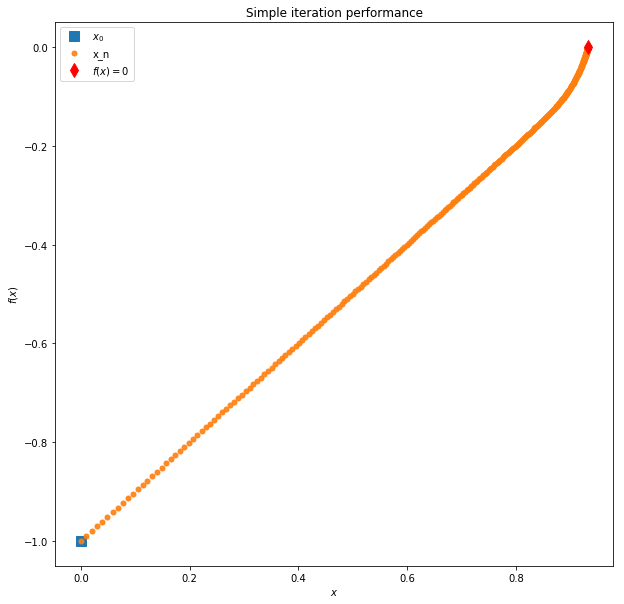

In [10]:
s = SimpleIteration(f)
s.solve(0)
s.plot()

In [11]:
class NewtonSolver (SimpleIteration):
    def __init__(self, f, df, eps=1e-8,
                 max_iter=10000, logging=True):
        super().__init__(f, eps=eps, max_iter=max_iter,
                         logging=logging)
        self.df = df

    def solve(self, x0=0.0):
        x_n = x0
        for i in range(self.max_iter):
            self.add_log(x_n, self.f(x_n))
            x_n -= self.f(x_n) / self.df(x_n)
            if abs(f(x_n)) < self.eps:
                print("# of iterations performed:", i)
                break
        return x_n

# of iterations performed: 6


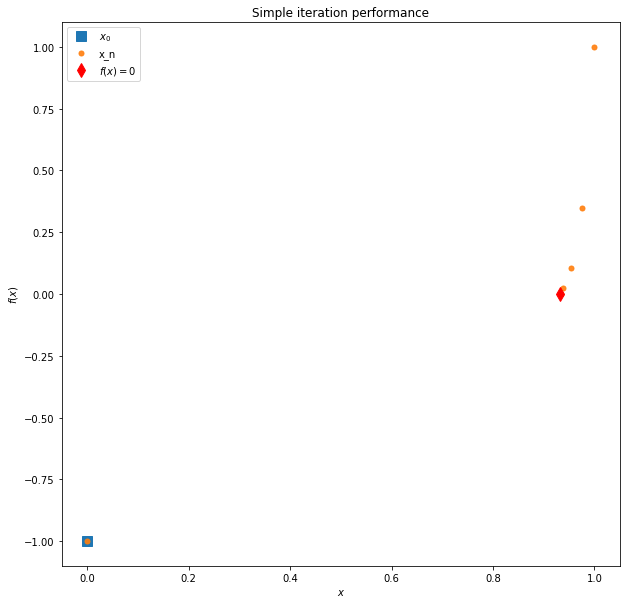

In [12]:
newton = NewtonSolver(f, df)
newton.solve()
newton.plot()

## Part2: Linear and Quadratic Approximation

In [13]:
xs = np.array(range(7)).reshape(-1, 1)
ys = np.array([n * _ for _ in [0, 2, 3.8, 5.8, 7.9, 9.8, 12]]).reshape(-1, 1)

In [14]:
class LeastSquares:
    def __init__(self):
        self.weights = None
        self.bias = 0
        self.log = []
    def fit_closed_form(self, X, y):
        self.weights= np.linalg.pinv(X.T @ X) @ X.T @ y
        
    def fit_GD(self, X, y, alpha=0.01, n_iter=100, eps=1e-8):
        self.weights = np.random.randn(X.shape[1]).reshape(-1, 1) / 100
        self.bias = 1
        n = y.shape[0]
        for i in range(n_iter):
            y_pred = X @ self.weights + self.bias
            err = (y_pred - y)
            self.weights -= alpha * (X.T @ err) / n
            self.bias -= alpha * err.sum() / n
    
    def predict(self, X):
        return X @ self.weights + self.bias

In [15]:
# x values used for plotting
x_pred = np.linspace(xs[0], xs[-1])[:, np.newaxis]

In [16]:
ls = LeastSquares()
ls.fit_closed_form(xs, ys)
y_closed = ls.predict(x_pred)

In [17]:
ls.fit_GD(xs, ys)
y_grad = ls.predict(x_pred)

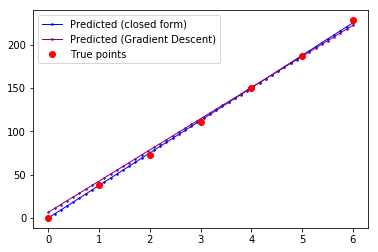

In [19]:
plt.plot(x_pred, y_closed, label="Predicted (closed form)",
         marker='.', linewidth=1, c='blue', markersize=3);
plt.plot(x_pred, y_grad, label="Predicted (Gradient Descent)",
        marker='.', linewidth=1, c='purple', markersize=3)
plt.plot(xs, ys, label="True points",
         marker='o', linewidth=0, c='red')
plt.legend();

In [43]:
# quadratic part
ls = LeastSquares()
X_quad = np.hstack([xs, xs ** 2])
X_quad_pred = np.hstack([x_pred, x_pred ** 2])
ls.fit_closed_form(X_quad, ys)
y_quad_closed = ls.predict(X_quad_pred)
ls.fit_GD(X_quad, ys, alpha=0.001, n_iter=10000)
y_quad_grad = ls.predict(X_quad_pred)

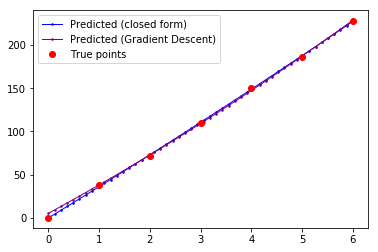

In [44]:
plt.plot(x_quad_pred[:, 0], y_quad_closed, label="Predicted (closed form)",
         marker='.', linewidth=1, c='blue', markersize=3);
plt.plot(x_quad_pred[:, 0], y_quad_grad, label="Predicted (Gradient Descent)",
        marker='.', linewidth=1, c='purple', markersize=3)
plt.plot(xs, ys, label="True points",
         marker='o', linewidth=0, c='red')
plt.legend();